In [1]:
import os
os.environ["OMP_NUM_THREADS"]="1"
import warnings
warnings.filterwarnings('ignore')

## 1. a) Create a CSV file named “Customer.csv” having the following Columns
Serial_No	Customer_ID	Age	Edu	Years_Employed	Address	Income

In [2]:
import csv
import random

# Define the header and function to generate random customer data
header = ["Serial_No", "Customer_ID", "Age", "Edu", "Years_Employed", "Address", "Income"]

def generate_customer_data(serial_no):
    customer_id = f"C{str(serial_no).zfill(4)}"
    age = random.randint(18, 70)
    education_levels = ["High School", "Associate", "Bachelors", "Masters", "Doctorate"]
    edu = random.choice(education_levels)
    years_employed = random.randint(0, 40)
    address = f"{random.randint(1, 9999)} {random.choice(['Elm', 'Oak', 'Pine', 'Maple', 'Cedar'])} St, Springfield"
    income = random.randint(30000, 150000)
    return [serial_no, customer_id, age, edu, years_employed, address, income]

# Generate a dataset with 1,000 entries
large_data = [generate_customer_data(i) for i in range(1, 1001)]

# Specify the file path where you want to save the CSV
file_path_large = r"C:\Users\Sumit Paul\Downloads\Customer.csv"

# Write the data to a CSV file
with open(file_path_large, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header
    writer.writerows(large_data)  # Write the large dataset

print(f"CSV file created successfully at {file_path_large}")

CSV file created successfully at C:\Users\Sumit Paul\Downloads\Customer.csv


## b) Drop the column Address

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Customer.csv')

# Drop the 'Address' column
df = df.drop(columns=['Address'])

# Save the modified DataFrame back to a CSV file
df.to_csv('Customer_modified.csv', index=False)

## c) Perform k-means clustering

## d) In the CSV file append a column label where labels of all data should be present

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the modified CSV file
df = pd.read_csv('Customer_modified.csv')

# Convert categorical 'Edu' to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Edu'], drop_first=True)

# Select features for clustering
features = df_encoded[['Age', 'Years_Employed', 'Income'] + [col for col in df_encoded if col.startswith('Edu_')]]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster_Label'] = kmeans.fit_predict(features_scaled)

# Save the DataFrame with cluster labels back to a CSV file
df.to_csv('Customer_with_labels.csv', index=False)

## 2. a) Perform k-means clustering on the following data (1,2), (1,4), (1,0), (10,2), (10,4), (10,0) k=2

## b) Print the cluster centers

In [5]:
import numpy as np
from sklearn.cluster import KMeans

# Define the data points
data = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Initialize KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model
kmeans.fit(data)

# Obtain the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster Centers:")
print(centers)

print("\nLabels for each data point:")
print(labels)

Cluster Centers:
[[10.  2.]
 [ 1.  2.]]

Labels for each data point:
[1 1 1 0 0 0]


## c) Scatter plot (Plot the data’s using different colors for different clusters)

## d) Print the labels of each data.

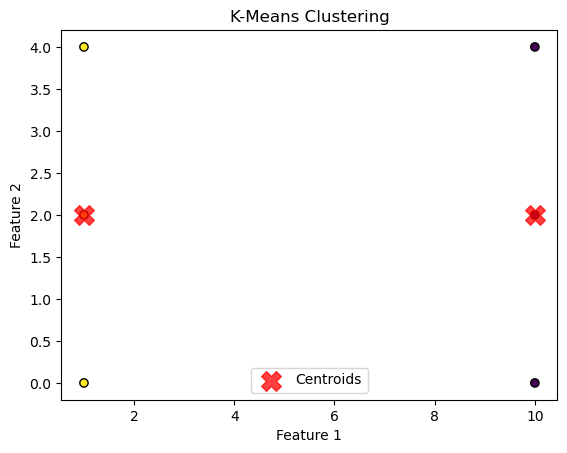

In [6]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

# 3. Perform K-means clustering on the Iris dataset

Cluster Centers:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.901613          2.748387           4.393548          1.433871
1           5.006000          3.428000           1.462000          0.246000
2           6.850000          3.073684           5.742105          2.071053

Labels for each data point:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


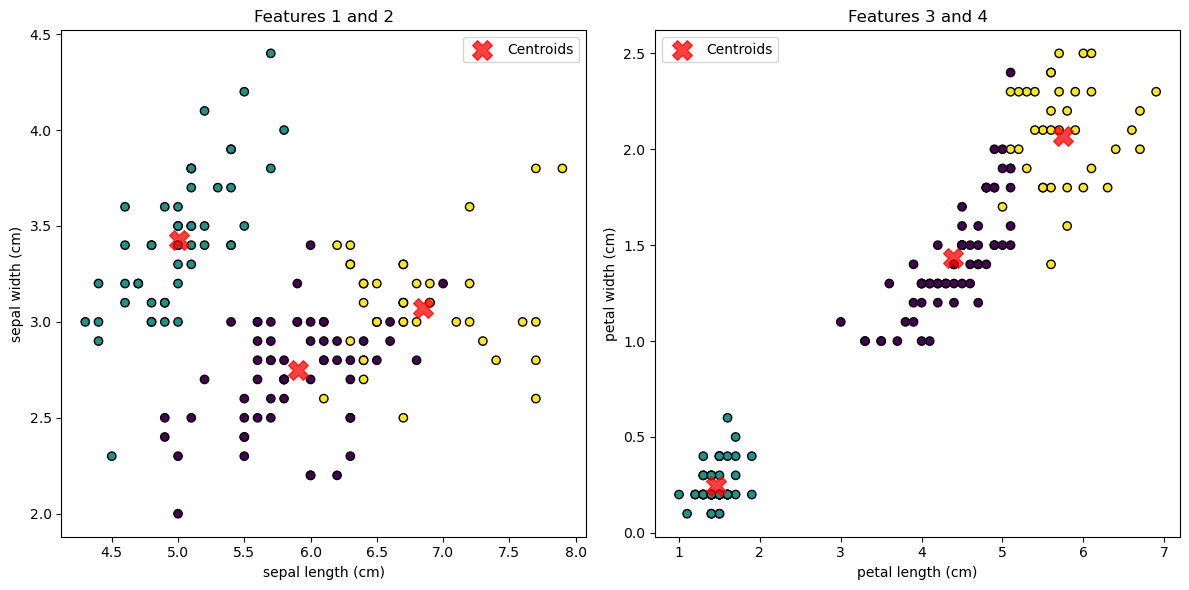

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(centers, columns=feature_names))

# Print the labels for each data point
print("\nLabels for each data point:")
print(labels)

# Scatter plot for the first two features
plt.figure(figsize=(12, 6))

# Plot the data points and cluster centers
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Features 1 and 2')
plt.legend()

# Scatter plot for the last two features
plt.subplot(1, 2, 2)
plt.scatter(data[:, 2], data[:, 3], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Features 3 and 4')
plt.legend()

plt.tight_layout()
plt.show()